In [4]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
for moulde in tf,np,pd:
    print(moulde.__name__, moulde.__version__)

tensorflow 2.0.0
numpy 1.18.1
pandas 1.0.1


In [5]:
white_wine = 'data/wine/winequality-white.csv'
red_wine = 'data/wine/winequality-red.csv'


In [27]:
with open(white_wine, 'r') as f:
    col = f.readlines(1)[0]
columns = [i.strip('\n"') for i in col.split('";"')]
columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [16]:
wine_ds = tf.data.experimental.make_csv_dataset(
    file_pattern=[white_wine,red_wine],
    batch_size = 32,
    label_name = "quality",
    field_delim=';',
    ignore_errors=True,
)
for data, label in wine_ds.take(1):
    print(data,label)


OrderedDict([('fixed acidity', <tf.Tensor: id=402, shape=(32,), dtype=float32, numpy=
array([ 9. ,  6.4,  8.4,  6.6,  8.1,  6.6,  5.9,  6.2,  6.9,  7.5,  8. ,
        6.9,  7.4,  6.4,  6.7,  6.8,  6.6,  8.2,  7.1,  6.2,  7.4,  5.6,
        7.3,  6. ,  8.5,  6.7,  7.1,  8.1, 10.2,  6.6,  6.3,  6.6],
      dtype=float32)>), ('volatile acidity', <tf.Tensor: id=408, shape=(32,), dtype=float32, numpy=
array([0.4 , 0.42, 0.31, 0.21, 0.26, 0.26, 0.29, 0.44, 0.44, 0.35, 0.37,
       0.18, 0.16, 0.17, 0.58, 0.29, 0.24, 0.23, 0.44, 0.39, 0.32, 0.62,
       0.28, 0.39, 0.34, 0.14, 0.84, 0.2 , 0.29, 0.96, 0.17, 0.22],
      dtype=float32)>), ('citric acid', <tf.Tensor: id=400, shape=(32,), dtype=float32, numpy=
array([0.41, 0.46, 0.31, 0.3 , 0.37, 0.25, 0.32, 0.18, 0.  , 0.28, 0.31,
       0.38, 0.3 , 0.27, 0.08, 0.5 , 0.27, 0.37, 0.62, 0.24, 0.22, 0.03,
       0.36, 0.17, 0.44, 0.46, 0.02, 0.3 , 0.49, 0.  , 0.32, 0.28],
      dtype=float32)>), ('residual sugar', <tf.Tensor: id=405, shape=(32,), d

In [28]:
feature_columns = []
for col in columns:
    feature_columns.append(tf.feature_column.numeric_column(col))
feature_columns

[NumericColumn(key='fixed acidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='volatile acidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='citric acid', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='residual sugar', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='chlorides', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='free sulfur dioxide', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='total sulfur dioxide', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='density', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pH', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sulphates', shape=(1,),

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.DenseFeatures(feature_columns))
for _ in range(20):
    model.add(keras.layers.Dense(64,activation='relu'))

model.add(keras.layers.Dense(7,activation='softmax'))

# keras.losses.sparse_categorical_crossentropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'],)
# model.summary()

In [41]:

history = model.fit(wine_ds,epochs = 100)

ValueError: 'citric acid' is not a valid scope name

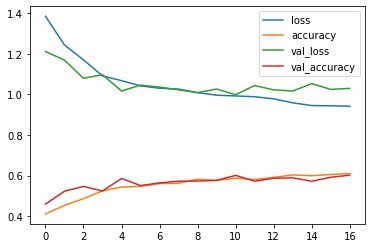

In [23]:
pd.DataFrame(history.history).plot()
plt.show()

In [24]:
print(model.evaluate(x_test,y_test,verbose =2))
y_pred = model.predict_classes(x_test)
for true, pred in zip(y_test, y_pred):
    print(true, '--->', pred ,':','r' if true == pred else 'wrong')


1625/1 - 0s - loss: 1.0621 - accuracy: 0.5508
[1.0717522434821496, 0.5507692]
2 ---> 2 : r
0 ---> 2 : wrong
4 ---> 4 : r
3 ---> 4 : wrong
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 3 : wrong
5 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
3 ---> 2 : wrong
4 ---> 4 : r
3 ---> 2 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
3 ---> 4 : wrong
3 ---> 2 : wrong
5 ---> 4 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 4 : wrong
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
2 ---> 2 : r
5 ---> 4 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 2 : r
3 ---> 2 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
1 ---> 2 : wrong
3 ---> 2 

3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 4 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 2 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 2 : wrong
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
1 ---> 2 : wrong
2 ---> 2 : r
3 ---> 2 : wrong
2 ---> 3 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 2 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
3 ---> 4 : wrong
2 ---> 3 : wrong
0 ---> 3 : wrong
5 ---> 4 : wrong
1 ---> 2 : wrong
3 ---> 4 : wrong
2 ---> 2 : r
4 ---> 3 : wrong
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
4 ---> 4 : r
3 ---> 2 : wrong
4 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
4 ---> 3 : wrong
3 ---> 3 

3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
4 ---> 2 : wrong
2 ---> 3 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
1 ---> 2 : wrong
3 ---> 2 : wrong
3 ---> 2 : wrong
1 ---> 2 : wrong
4 ---> 3 : wrong
1 ---> 2 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
2 ---> 4 : wrong
2 ---> 2 : r
5 ---> 4 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
1 ---> 3 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
5 ---> 3 : wrong
2 ---> 2 : r
4 ---> 2 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
3 ---> 4 : wrong
2 ---> 2 : r
3 ---> 3 : r
5 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 4 : wrong
2 ---> 3 : wrong
2 ---> 2 : r
4 ---> 4 : r
4 ---> 4 : r
3 ---> 2 : wrong
4

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
tree_classifier = DecisionTreeClassifier()
forest_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
tree_classifier.fit(x_train,y_train)
forest_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train, y_train)

t_score = tree_classifier.score(x_test,y_test)
f_score = forest_classifier.score(x_test,y_test)
k_score = knn_classifier.score(x_test, y_test)
print('{:.2f},{:.2f},{:.2f}'.format(t_score, f_score,k_score))

0.61,0.68,0.56


In [26]:
y_pred = forest_classifier.predict(x_test)
for true, pred in zip(y_test, y_pred):
    print(true, '--->', pred ,':','r' if true == pred else 'wrong')


2 ---> 2 : r
0 ---> 2 : wrong
4 ---> 4 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 2 : r
5 ---> 3 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 2 : wrong
3 ---> 2 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
3 ---> 3 : r
5 ---> 4 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
5 ---> 5 : r
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 2 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
4 ---> 4 : r
1 ---> 3 : wrong
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 --->

4 ---> 3 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 3 : r
2 ---> 2 : r
0 ---> 3 : wrong
5 ---> 5 : r
1 ---> 1 : r
3 ---> 3 : r
2 ---> 3 : wrong
4 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
4 ---> 4 : r
4 ---> 3 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 3 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
2 ---> 2 : r
4 ---> 4 : r
3 ---> 3 : r
2 ---> 2 : r
4 ---> 4 : r
3 ---> 2 : wrong
4 ---> 4 : r
2 ---> 2 : r
3 ---> 2 : wrong
4 ---> 4 : r
2 ---> 2 : r
2 ---> 2 : r
2 ---> 3 : wrong
4 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
2 ---> 2 : r
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
2 ---> 2 

2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
5 ---> 3 : wrong
3 ---> 2 : wrong
3 ---> 3 : r
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
4 ---> 4 : r
2 ---> 3 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 4 : wrong
1 ---> 2 : wrong
3 ---> 2 : wrong
3 ---> 2 : wrong
1 ---> 2 : wrong
4 ---> 3 : wrong
1 ---> 1 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 4 : wrong
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
5 ---> 5 : r
3 ---> 2 : wrong
2 ---> 2 : r
1 ---> 3 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
5 ---> 5 : r
2 ---> 2 : r
4 ---> 4 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
3 ---> 4 : wrong
2 ---> 2 : r
3 ---> 3 : r
5 ---> 5 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 

In [27]:
model.save('data/wine_model.h5')

In [28]:
load_model  = keras.models.load_model('data/wine_model.h5')
load_model.evaluate(x_test,y_test,verbose =2)

1625/1 - 1s - loss: 1.0621 - accuracy: 0.5508


[1.0717522434821496, 0.5507692]